# K Nearest Neighbors Project by Sanjana Suresh






## Import Libraries
**Import pandas,seaborn, and the usual libraries.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data
**Read the'KNN_Data'csv file into a dataframe.**

**Concepts Used:**
1. read_csv() - It is a method in the pandas library that allows accessing a csv file.

In [3]:
file_path = "/content/sample_data/KNN_Data.csv"     #Uploaded the .csv file to drive and storing the file path
df = pd.read_csv(file_path)             #Loading the data in a dataframe df using the read_csv file by passing the file path

**Check the head of the dataframe.**

**Concepts Used:**
1. head() - It is a method in the pandas library that displays the first 5 rows of the dataframe by default

In [4]:
df.head()                              #Displaying the head of the dataframe df.

XVPM         GWYH         TRAT        TLLZ         IGGA  \
0  1636.670614   817.988525  2565.995189  358.347163   550.417491   
1  1013.402760   577.587332  2644.141273  280.428203  1161.873391   
2  1300.035501   820.518697  2025.854469  525.562292   922.206261   
3  1059.347542  1066.866418   612.000041  480.827789   419.467495   
4  1018.340526  1313.679056   950.622661  724.742174   843.065903   

          HYKR         EDFS        GUUB         MGJM         JHZC  \
0  1618.870897  2147.641254  330.727893  1494.878631   845.136088   
1  2084.107872   853.404981  447.157619  1193.032521   861.081809   
2  2552.355407   818.676686  845.491492  1968.367513  1647.186291   
3   685.666983   852.867810  341.664784  1154.391368  1450.935357   
4  1370.554164   905.469453  658.118202   539.459350  1899.850792   

   TARGET CLASS  
0             0  
1             1  
2             1  
3             0  
4             0

# EDA

Since this data is artificial, we'll just do a large pairplot with seaborn.

**Use seaborn on the dataframe to create a pairplot with the hue indicated by the TARGET CLASS column.**

**Concepts Used:**
1. sns - It is the alias name for the seaborn library that is used for creating statistical graphics in Python
2. pairplot() - This method belongs to the seaborn library and is used to plot pairwise relationship(bivariate between variables(bivariate) in a dataset.It returns a pairgrid as output.
3. hue - It is one of the arguments that the pairplot() accepts, to map plot features to different colors.
4. diag_kind - This parameter is set to 'hist' to get histogram representation across the diagonal

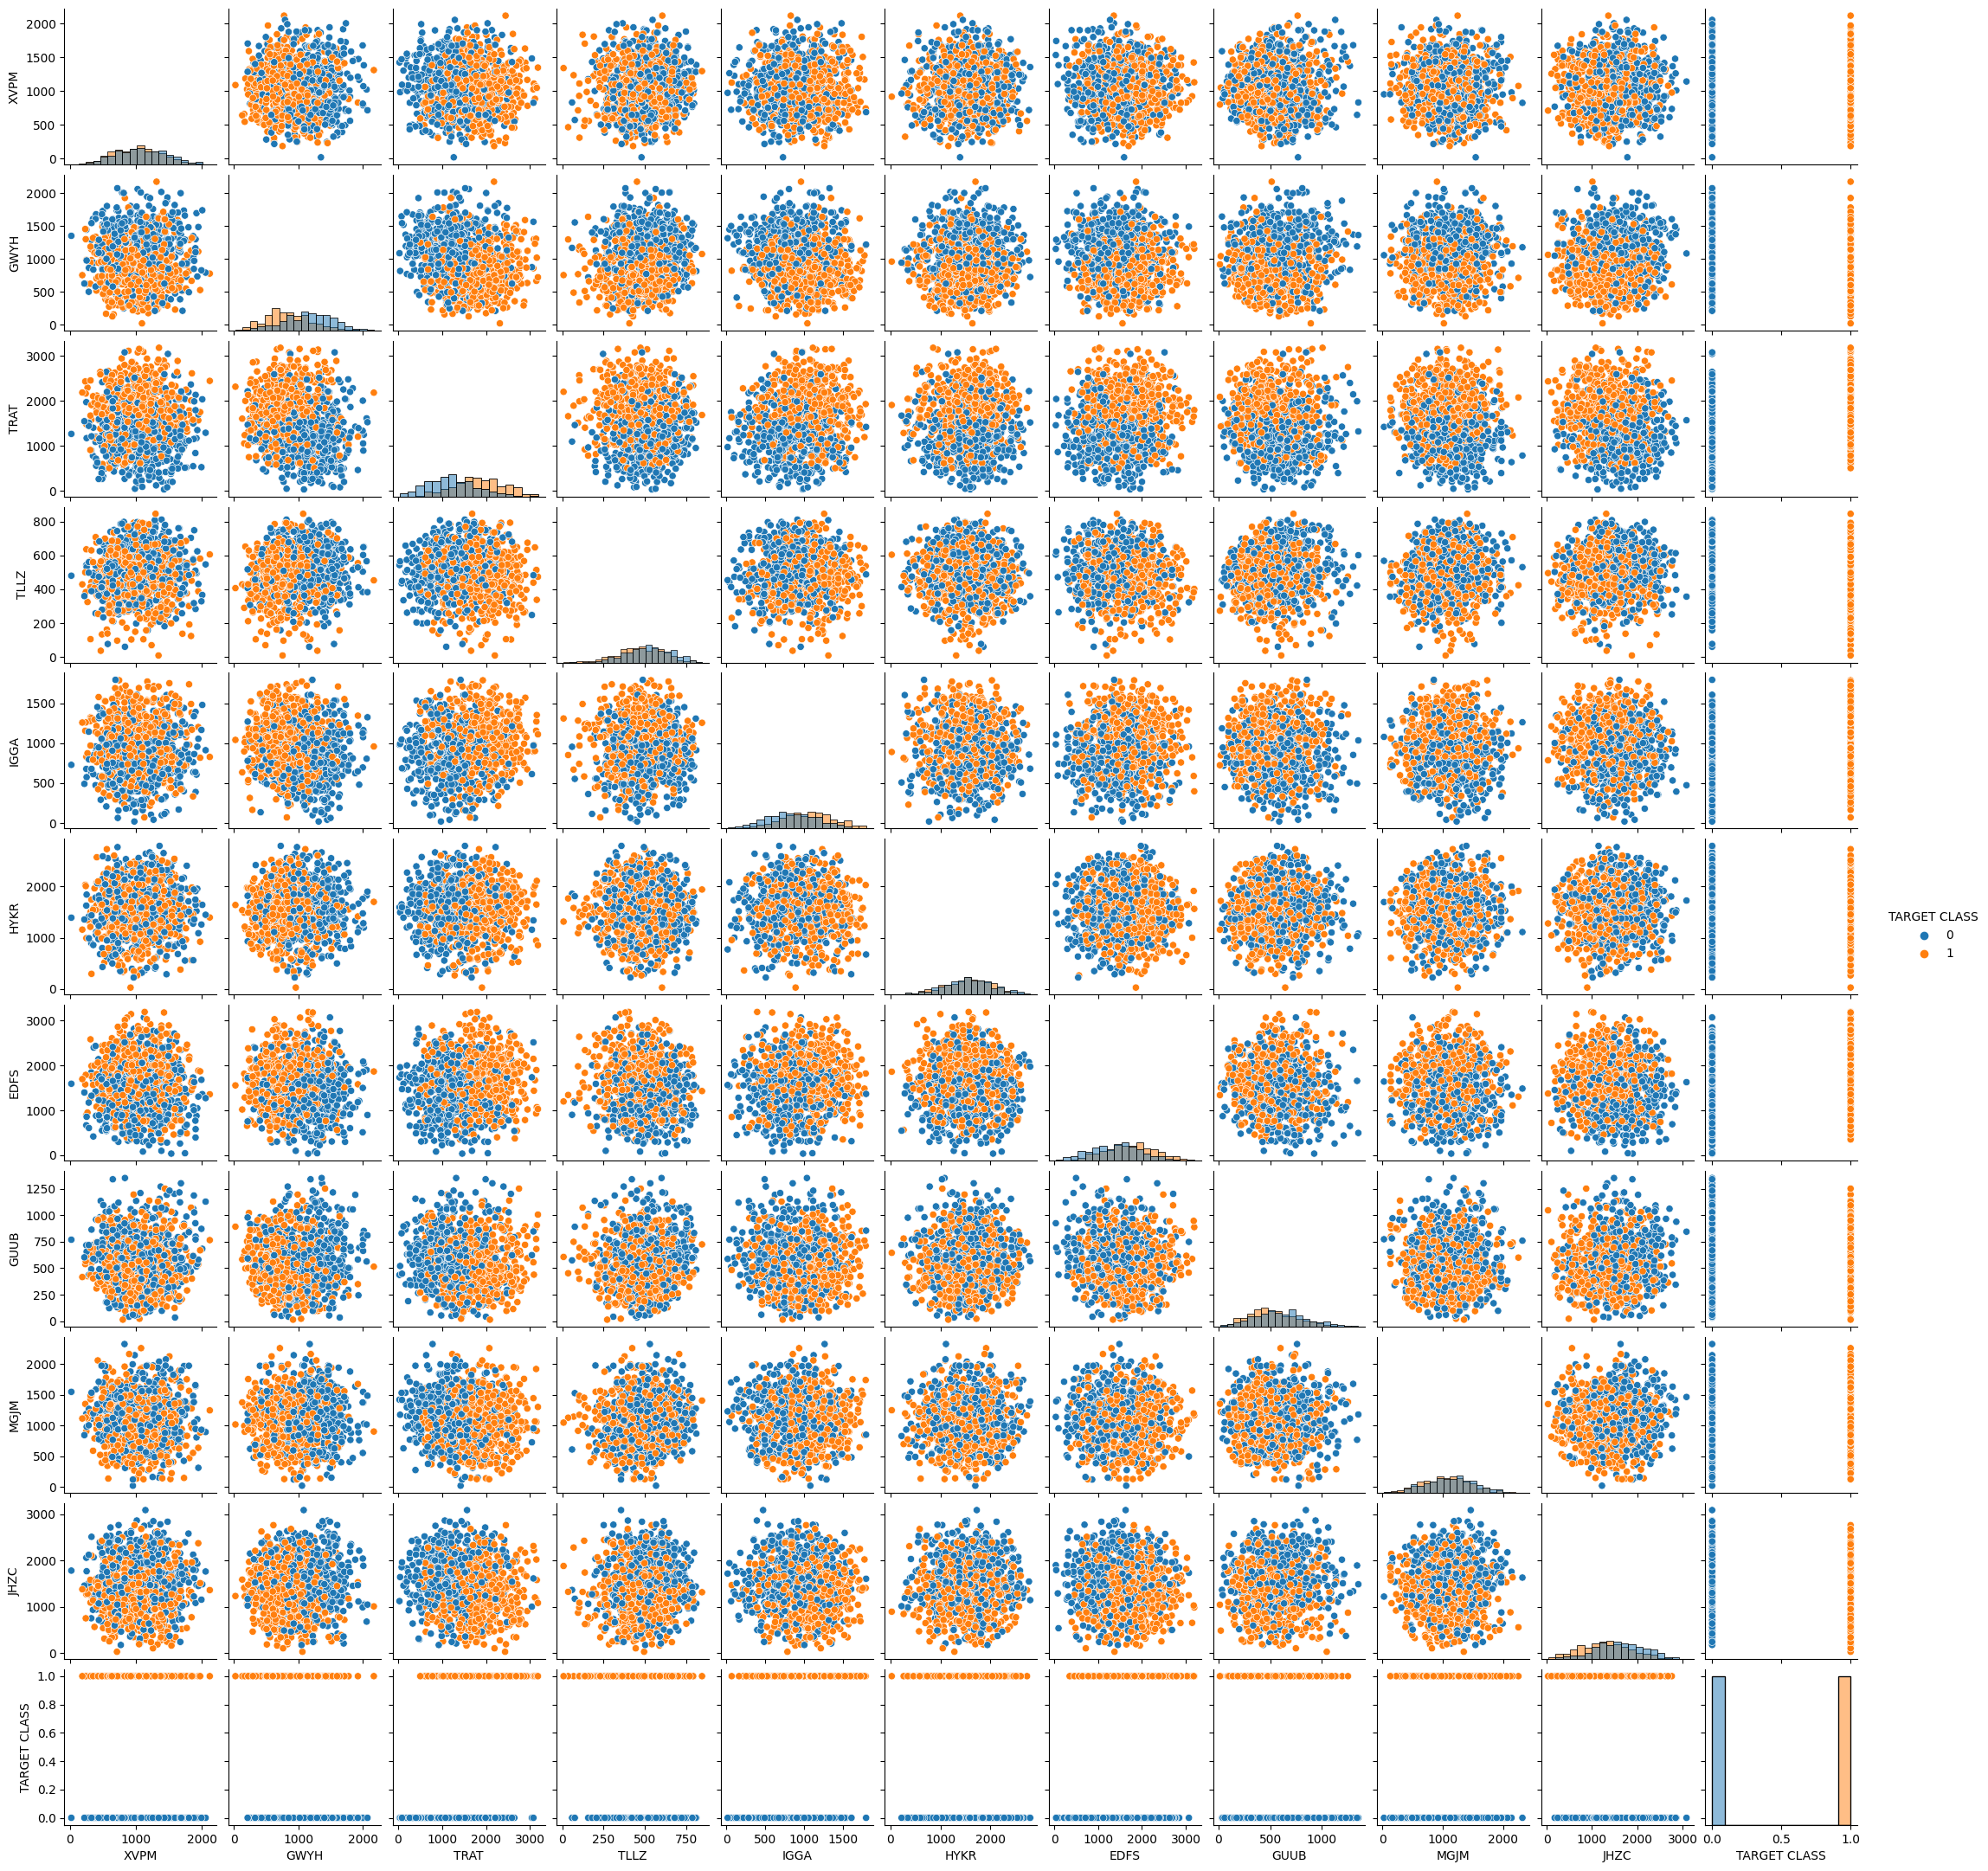

In [5]:
sns.pairplot(data = df, hue = 'TARGET CLASS', height =2,diag_kind = 'hist',vars=['XVPM', 'GWYH', 'TRAT', 'TLLZ' , 'IGGA', 'HYKR', 'EDFS', 'GUUB', 'MGJM', 'JHZC', 'TARGET CLASS'])


# Standardize the Variables

Time to standardize the variables.

**Import StandardScaler from Scikit learn.**

**Concepts Used:**
1. StandardScaler - It is part of the sklearn.preprocessing package that transforms raw vectors into a standardized format by subtracting the mean and then scaling to unit variance


In [ ]:
from sklearn.preprocessing import StandardScaler                      #importing the StandardScalar from SciKit learn library

**Create a StandardScaler() object called scaler.**

In [ ]:
scaler = StandardScaler()                                            #Storing a StandardScalar object in a variable scalar

**Fit scaler to the features.**

**Concept Used:**

**Purpose of Standardising** - It is done to the feature class input to avoid any outliers from affecting the distance between observations and bring it within range

In [ ]:
scaler.fit(df.drop('TARGET CLASS',axis=1))                           #fitting the input data of the feature class alone by calculating mean and std deviation

StandardScaler()

**Use the .transform() method to transform the features to a scaled version.**

In [ ]:
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))  #Transforming the feature class into a scaled form


**Convert the scaled features to a dataframe and check the head of this dataframe to make sure the scaling worked.**

In [ ]:
scaled_df = pd.DataFrame(scaled_features, columns=['XVPM', 'GWYH', 'TRAT', 'TLLZ', 'IGGA', 'HYKR', 'EDFS', 'GUUB', 'MGJM',  'JHZC']) #coverting to df
scaled_df.head()                                                                                                                     #printing first 5 rows

XVPM      GWYH      TRAT      TLLZ      IGGA      HYKR      EDFS  \
0  1.568522 -0.443435  1.619808 -0.958255 -1.128481  0.138336  0.980493   
1 -0.112376 -1.056574  1.741918 -1.504220  0.640009  1.081552 -1.182663   
2  0.660647 -0.436981  0.775793  0.213394 -0.053171  2.030872 -1.240707   
3  0.011533  0.191324 -1.433473 -0.100053 -1.507223 -1.753632 -1.183561   
4 -0.099059  0.820815 -0.904346  1.609015 -0.282065 -0.365099 -1.095644   

       GUUB      MGJM      JHZC  
0 -0.932794  1.008313 -1.069627  
1 -0.461864  0.258321 -1.041546  
2  1.149298  2.184784  0.342811  
3 -0.888557  0.162310 -0.002793  
4  0.391419 -1.365603  0.787762

# Train Test Split

**Use train_test_split to split your data into a training set and a testing set.**

**Concept Used:**

**train_test_split** - This belongs to the sklearn.model_selection library that uses a strategy to randomly split the input data as training and testing so as to train the model and later evaluate the model. This process is done to avoid the problem of overfitting or underfitting


In [ ]:
from sklearn.model_selection import train_test_split                     #importing the train_test_split module
X = scaled_df                                                            #storing the scaled df from the previous step in the feature class X
y = df['TARGET CLASS']                                                   #storing the target class of 0s and 1s in the target class y


**Concepts Used:**

1.train_test_split() - Accepts arguments to split as training and testing data

2.test_size - This value is set to indicate the percentage of data split for testing or in other words it is the test data size

3.random_state - It ensures that the same randomization is used each time you run the code, resulting in the same splits of the data. It is set in such a way so as to reproduce the desirable output of a model

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=110)    #30% of the dataset is set for testing and remaining for training

# Using KNN

**Import KNeighborsClassifier from scikit learn.**

**Concepts used:**

KNeighborsClassifier - It belongs to the sklearn.neighbors library that is capable of implementing the knn classification

n_neighbors - This is used to set the number of neighbors for calculating the distance between them

In [ ]:
from sklearn.neighbors import KNeighborsClassifier                                          #importing the appropriate classifier from skikit learn

**Create a KNN model instance with n_neighbors=1**

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)                                                  #setting the number of neighbors as 1

**Fit this KNN model to the training data.**

**Concept Used:**

fit() - This is process of providing the model with the training data that we split. It is the process of storing the dataset, so we can compute neighbors during prediction

In [ ]:
knn.fit(X_train, y_train)                                                                 #Fitting the model by feeding the training dataset

KNeighborsClassifier(n_neighbors=1)

# Predictions and Evaluations
Let's evaluate our KNN model!

**Use the predict method to predict values using your KNN model and X_test.**

**Concept Used:**

predict() - This is used to evaluate our KNN model to compute the nearest neighbor for each data point in the test set in that of the training set and thereby find the most popular class among those.

In [ ]:
prediction = knn.predict(X_test)                                                        #Predicting the most common class using the test dataset

** Create a confusion matrix and classification report.**

**Concepts Used:**

confusion_matrix() - It belongs to the metrics package of the sklearn library to determine the quality of output of the classifier

classification_report() - It belongs to the metrics package of the sklearn library to determine the different metrics of the classifier such as precision, f1-score, etc..

In [ ]:
from sklearn.metrics import confusion_matrix

#Providing the test output class and predicted output to determine the accuracy of the model
confusion_matrix(y_test,prediction)

array([[111,  40],
       [ 35, 114]])

In [ ]:
from sklearn.metrics import classification_report

**Classification report term definition**

1. Precision: Percentage of correct positive predictions relative to total positive predictions.

2. Recall: Percentage of correct positive predictions relative to total actual positives.

3. F1 Score: A weighted harmonic mean of precision and recall. The closer to 1, the better the model.

4. Support: The number of actual occurrences of the class in the specified dataset.

In [ ]:

print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.76      0.74      0.75       151
           1       0.74      0.77      0.75       149

    accuracy                           0.75       300
   macro avg       0.75      0.75      0.75       300
weighted avg       0.75      0.75      0.75       300



# Choosing a K Value
Let's go ahead and use the elbow method to pick a good K Value!

** Create a for loop that trains various KNN models with different k values, then keep track of the error_rate for each of these models with a list. Refer to the lecture if you are confused on this step.**

**Concept Used:**
**STEPS IN CHOOSING K:**


*   Choose K for a range from 1 to 40.
*   Use the for loop to iterate over each K value and find the nearest neighbor with least error
*   Train the model using the fit() and store the predicted values of the test data using the predict()
*   use np.mean() to find the average of the data for which the predicted output does not match with the test output
*   Append these to error_rate list to keep track of the accuracy of the model










In [ ]:
error_rate =[]
for k in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    prediction = knn.predict(X_test)
    error_rate.append(np.mean(prediction != y_test))

**Now create the following plot using the information from your for loop.**

Text(0, 0.5, 'Error Rate')

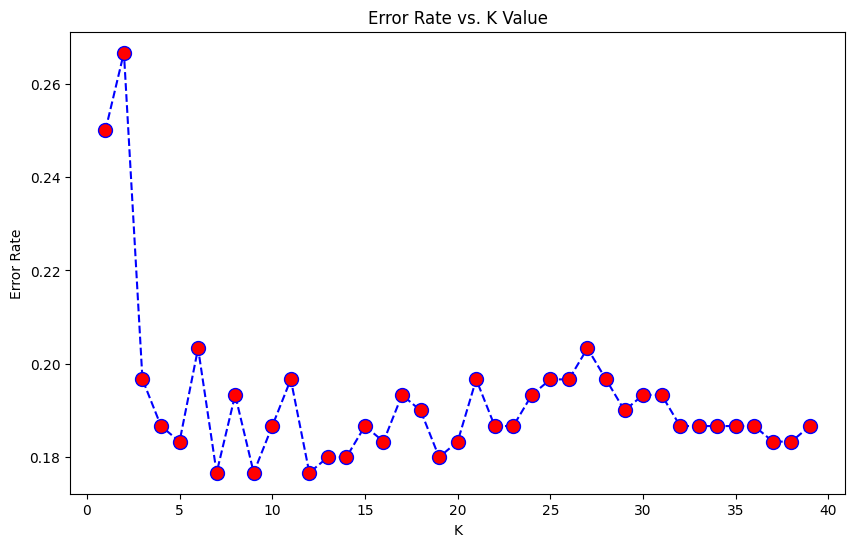

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

## Retrain with new K Value

**Retrain your model with the best K value (up to you to decide what you want) and re-do the classification report and the confusion matrix.**

From the above Error Rate vs K graph, we can deduce that that, when K=7 the error rate is minimal around 0.14 and is the point where the elbow(bend) is observed and gets constant. Redoing the classification with K=32, we get the below accuracy as observed from the confusion matrix. Choosing such a value that is not too high or too low will help to avoid computational cost and is considered optimal:

**RETRAINING THE MODEL WITH K=32**

In [ ]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
prediction = knn.predict(X_test)

**CREATING THE CONFUSION MATRIX AND CLASSIFICATION REPORT**

In [ ]:
print(confusion_matrix(y_test,prediction))
print(classification_report(y_test,prediction))

[[122  29]
 [ 24 125]]
              precision    recall  f1-score   support

           0       0.84      0.81      0.82       151
           1       0.81      0.84      0.83       149

    accuracy                           0.82       300
   macro avg       0.82      0.82      0.82       300
weighted avg       0.82      0.82      0.82       300



# Great Job!